In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('share_price_data.csv')
df.head(5)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Feb-2020,EQ,750.00,756.80,722.05,777.85,732.00,731.70,738.68,847.00,615.1,14123957,"10,433,101,671.40",277778
1,27-Feb-2020,EQ,778.00,780.75,772.20,782.75,776.55,777.85,777.16,847.00,615.1,5223386,"4,059,425,154.50",100716
2,26-Feb-2020,EQ,793.95,801.45,780.50,798.40,782.25,782.75,791.65,847.00,615.1,8760569,"6,935,314,353.15",168481
3,25-Feb-2020,EQ,799.00,806.00,795.40,795.85,799.50,798.40,799.93,847.00,615.1,6996695,"5,596,900,401.25",114637
4,24-Feb-2020,EQ,800.10,811.60,792.15,797.00,795.90,795.85,804.05,847.00,615.1,6627536,"5,328,879,149.90",130286


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
Date             245 non-null object
series           245 non-null object
OPEN             245 non-null float64
HIGH             245 non-null float64
LOW              245 non-null float64
PREV. CLOSE      245 non-null float64
ltp              245 non-null float64
close            245 non-null float64
vwap             245 non-null float64
52W H            245 non-null object
52W L            245 non-null float64
VOLUME           245 non-null int64
VALUE            245 non-null object
No of trades     245 non-null int64
dtypes: float64(8), int64(2), object(4)
memory usage: 26.9+ KB


In [4]:
df.describe()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W L,VOLUME,No of trades
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02,2.450000e+02
mean,749.124286,756.273878,741.980816,749.137551,749.122857,749.126939,749.321878,603.833673,8.950865e+06,1.708187e+05
std,39.194788,39.310458,39.581893,39.645797,39.666702,39.650132,39.113374,6.713070,8.093399e+06,1.414842e+05
min,630.000000,652.500000,615.100000,635.350000,634.700000,635.350000,643.660000,599.850000,2.112415e+06,3.676900e+04
25%,720.000000,726.400000,712.600000,720.100000,720.000000,720.100000,719.310000,599.850000,5.447130e+06,1.105520e+05
50%,742.000000,748.400000,736.500000,742.650000,742.150000,742.650000,743.490000,599.850000,7.016424e+06,1.416540e+05
75%,782.000000,789.900000,774.400000,782.550000,782.250000,782.550000,781.010000,615.100000,9.733935e+06,1.835060e+05
max,843.300000,847.000000,835.050000,840.150000,840.250000,840.150000,840.490000,615.100000,9.015253e+07,1.643015e+06


In [5]:
df.dtypes

Date              object
series            object
OPEN             float64
HIGH             float64
LOW              float64
PREV. CLOSE      float64
ltp              float64
close            float64
vwap             float64
52W H             object
52W L            float64
VOLUME             int64
VALUE             object
No of trades       int64
dtype: object

In [6]:
col_names = list(df)

for i in range(len(col_names)):
    col_names[i] = col_names[i].strip()

df.columns = col_names
del(col_names)

df.drop('series', axis = 1, inplace = True)

In [7]:
for col_name in ['52W H', 'VALUE']:
    for i in range(len(df)):
        df[col_name].loc[i] = df[col_name].loc[i].replace(',', '')

C:\Users\subho\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
df.to_csv('csv_data.csv', index = False)

In [9]:
df = pd.read_csv('csv_data.csv')
df.head(5)

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Feb-2020,750.00,756.80,722.05,777.85,732.00,731.70,738.68,847.0,615.1,14123957,1.043310e+10,277778
1,27-Feb-2020,778.00,780.75,772.20,782.75,776.55,777.85,777.16,847.0,615.1,5223386,4.059425e+09,100716
2,26-Feb-2020,793.95,801.45,780.50,798.40,782.25,782.75,791.65,847.0,615.1,8760569,6.935314e+09,168481
3,25-Feb-2020,799.00,806.00,795.40,795.85,799.50,798.40,799.93,847.0,615.1,6996695,5.596900e+09,114637
4,24-Feb-2020,800.10,811.60,792.15,797.00,795.90,795.85,804.05,847.0,615.1,6627536,5.328879e+09,130286


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [11]:
df

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,
2020-02-28,750.00,756.80,722.05,777.85,732.00,731.70,738.68,847.0,615.10,14123957,1.043310e+10,277778
2020-02-27,778.00,780.75,772.20,782.75,776.55,777.85,777.16,847.0,615.10,5223386,4.059425e+09,100716
2020-02-26,793.95,801.45,780.50,798.40,782.25,782.75,791.65,847.0,615.10,8760569,6.935314e+09,168481
2020-02-25,799.00,806.00,795.40,795.85,799.50,798.40,799.93,847.0,615.10,6996695,5.596900e+09,114637
2020-02-24,800.10,811.60,792.15,797.00,795.90,795.85,804.05,847.0,615.10,6627536,5.328879e+09,130286
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-08,722.95,722.95,710.65,722.95,713.20,712.35,714.77,1467.9,599.85,7193994,5.142023e+09,154378
2019-03-07,734.00,734.50,720.55,732.50,723.30,722.95,724.84,1467.9,599.85,5951551,4.313907e+09,132988
2019-03-06,736.10,736.10,727.00,732.50,732.25,732.50,732.02,1467.9,599.85,6076668,4.448254e+09,201307


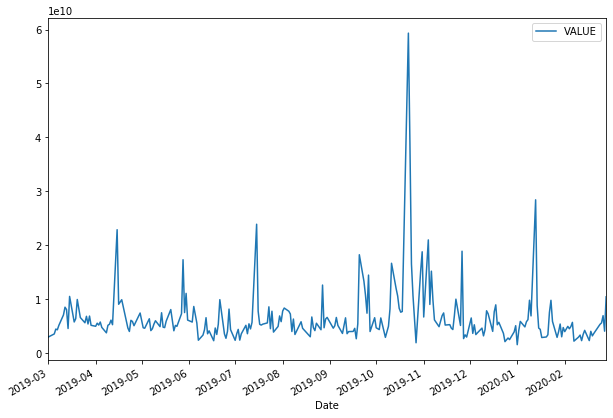

In [12]:
df.plot(y = 'VALUE', figsize = (10, 7))

In [13]:
df['MAX_RANGE'] = df['HIGH']-df['LOW']
df['DAY_RANGE'] = df['OPEN']-df['close']
df['AF_RANGE'] = df['PREV. CLOSE']-df['OPEN']

In [14]:
df.corr()['VALUE']

OPEN           -0.241315
HIGH           -0.186924
LOW            -0.309480
PREV. CLOSE    -0.160679
ltp            -0.254207
close          -0.252346
vwap           -0.246035
52W H          -0.117733
52W L          -0.151847
VOLUME          0.995465
VALUE           1.000000
No of trades    0.930233
MAX_RANGE       0.650573
DAY_RANGE       0.058371
AF_RANGE        0.402393
Name: VALUE, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from graphviz import Source
from sklearn.model_selection import train_test_split

In [16]:
reg_dict = {}

X = df.drop(['VALUE'], axis = 1)
y = df['VALUE'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [43]:
rid_reg = Ridge()
grid_reg = GridSearchCV(rid_reg, param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0]},
                       scoring = 'neg_mean_squared_error')
grid_reg.fit(X_train, y_train)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.6764e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.57618e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.93743e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.99247e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.1984e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_mode

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0,
                                   10.0, 15.0, 20.0, 30.0, 40.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [44]:
for alpha, score in zip(grid_reg.cv_results_['params'], grid_reg.cv_results_['mean_test_score']):
    print(alpha, score)

{'alpha': 0.001} -4.3195519993199034e+17
{'alpha': 0.01} -4.319540259799313e+17
{'alpha': 0.1} -4.31942298596409e+17
{'alpha': 0.2} -4.3192929398837376e+17
{'alpha': 0.5} -4.318904422467667e+17
{'alpha': 1.0} -4.3182622369977696e+17
{'alpha': 2.0} -4.316997471064746e+17
{'alpha': 5.0} -4.3133518502498906e+17
{'alpha': 10.0} -4.307722865643136e+17
{'alpha': 15.0} -4.302578194670174e+17
{'alpha': 20.0} -4.2978475155891245e+17
{'alpha': 30.0} -4.289410915036361e+17
{'alpha': 40.0} -4.2820685870293344e+17


In [45]:
rid_reg = Ridge()
grid_reg = GridSearchCV(rid_reg, param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0]},
                       scoring = 'neg_mean_squared_error')
grid_reg.fit(X_train, y_train)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.6764e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.57618e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.93743e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.99247e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.1984e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_mode

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0,
                                   10.0, 15.0, 20.0, 30.0, 40.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [46]:
for alpha, score in zip(grid_reg.cv_results_['params'], grid_reg.cv_results_['mean_test_score']):
    print(alpha, score)

{'alpha': 0.001} -4.3195519993199034e+17
{'alpha': 0.01} -4.319540259799313e+17
{'alpha': 0.1} -4.31942298596409e+17
{'alpha': 0.2} -4.3192929398837376e+17
{'alpha': 0.5} -4.318904422467667e+17
{'alpha': 1.0} -4.3182622369977696e+17
{'alpha': 2.0} -4.316997471064746e+17
{'alpha': 5.0} -4.3133518502498906e+17
{'alpha': 10.0} -4.307722865643136e+17
{'alpha': 15.0} -4.302578194670174e+17
{'alpha': 20.0} -4.2978475155891245e+17
{'alpha': 30.0} -4.289410915036361e+17
{'alpha': 40.0} -4.2820685870293344e+17


In [17]:
reg_dict['lin_reg'] = LinearRegression()
reg_dict['rid_reg'] = Ridge(alpha = 5.0)
reg_dict['las_reg'] = Lasso(alpha = )
reg_dict['els_reg'] = ElasticNet()
reg_dict['dec_reg'] = DecisionTreeRegressor(max_depth = 50, max_leaf_nodes = 50)
reg_dict['svm_reg'] = SVR(C = 20)
reg_dict['rnd_reg'] = RandomForestRegressor(n_estimators = 20, max_depth = 20, max_leaf_nodes = 50)

lin_reg 0.9926722997864315


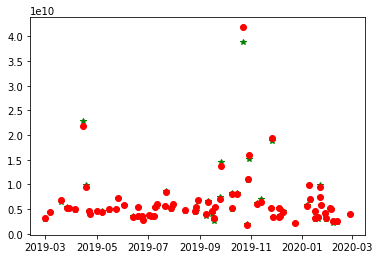

rid_reg 0.9926737616307165


C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.90454e-17): result may not be accurate.
  overwrite_a=True).T


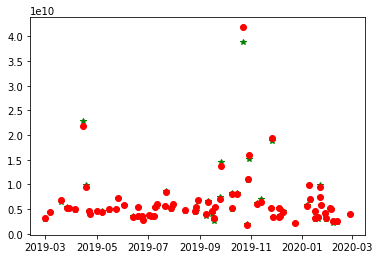

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.893648947842823e+18, tolerance: 5.3514705014492666e+17
  positive)


las_reg 0.9927509741530167


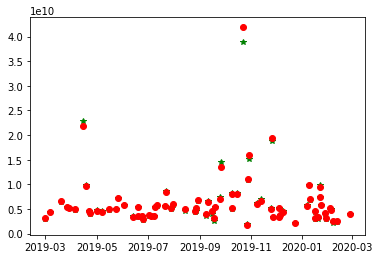

els_reg 0.9927815368355183


C:\Users\subho\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.919515885800585e+18, tolerance: 5.3514705014492666e+17
  positive)


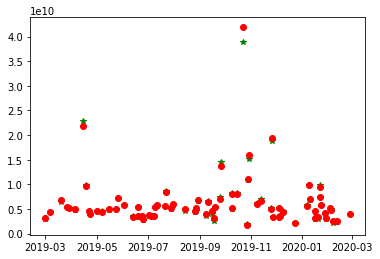

dec_reg 0.7866921411244914


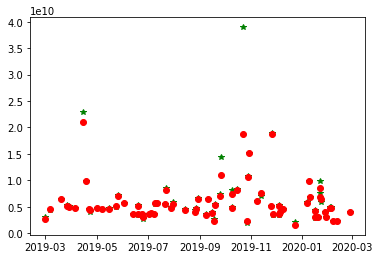

svm_reg -0.02847269539980113


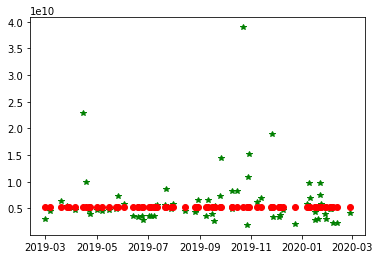

rnd_reg 0.8311630227813556


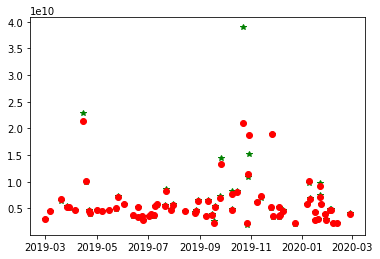

In [24]:
for keys, reg in zip(reg_dict.keys(), reg_dict.values()):
    reg.fit(X_train, y_train)
    print(keys, reg.score(X_test, y_test))
    plt.plot(X_test.index, y_test, 'g*')
    plt.plot(X_test.index, reg.predict(X_test), 'ro')
    plt.show()